Рассмотрим Optimal Brain Damage для задачи тематического моделирования. Напомним, перед нами ставится задача максимизации: 
$$
L = \sum_{d,w} n_{dw} \log \sum_{t} \phi_{wt} \theta_{td}
$$
У нас есть какое-то решение $\phi$  и $\theta$, мы хотим его сделать более разреженным, сохранив структуру и несильно испортив правдоподобие, используя метод OBD. 

Далее будем использовать стандартные обозначения ARTM ($p_{tdw}$, $n_{wt}$, $n_t$ и так далее).

### Математическая составляющая
####Зануление $\Phi$
 Для каждого $w$, $t$ определелим изменение правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_1 L = \sum_{d} n_{dw} \left( \log \sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} - \log \sum_{s} \phi_{ws} \theta_{sd} \right)=
\sum_{d} n_{dw} \log \frac{\sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} }{\sum_{s} \phi_{ws} \theta_{sd}}=
$$
$$
=
\sum_{d} n_{dw} \log \left( 1 - \frac{\phi_{wt} \theta_{td} }{\sum_{s} \phi_{ws} \theta_{sd}} \right) =
\sum_{d} n_{dw} \log(1 - p_{tdw}) \approx - \sum_{d} n_{dw} p_{tdw} = - n_{wt}
$$
Таким образом, если мы хотим занулять параметры модели для разреживания, кажется, что нужно занулять параметры с наименьшим значением $n_{wt}$. Однако, здесь опускается один важный момент: когда мы разреживаем модель и зануляем какой-то $\phi_{wt}$, вероятность всех остальных слов в теме увеличивается, а это увеличивает правдоподобие. Оценим эффект увеличения логарифма правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s \neq t} \phi_{us} \theta_{sd}  + \frac{\phi_{us}}{1 - \phi_{wt}} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s} \phi_{us} \theta_{sd}  + \frac{\phi_{wt}}{1 - \phi_{wt}} \phi_{us} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} \frac{\phi_{us} \theta_{td} }{\sum_{s} \phi_{us} \theta_{sd}}\right) = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
$$
$$
\approx \sum_{d, u \neq w} n_{du} \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \sum_{d, u \neq w} n_{du} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \left( n_t - n_{wt}\right) = 
$$
$$
=\frac{\phi_{wt} n_t}{1 - \phi_{wt}} \left( 1 - \frac{n_{wt}}{n_t}\right) \approx n_{wt}
$$
В первом приближении за счёт увеличения $\phi_{ut}$ при $u \neq w$ логарифм правдоподобия увеличится на $n_{wt}$. То есть суммарно в первом приближении правдоподобие не изменится. У данной проблемы есть два решения. Во-первых, мы можем честно посчитать $\Delta_1 L $ и $\Delta_2 L $ на Е-шаге и использовать их сумму (их можно эффективно быстро подсчитать, однако есть минус, что есть логарифмы, а это сказывается на скорости выполнения). Второй способ - разложить изменение не до первого члена в ряде тейлора, а до второго.
$$
\Delta_1 L = \sum_{d} n_{dw} \log(1 - p_{tdw}) \approx = - \sum_{d} n_{dw} \left( p_{tdw} + \frac12 p_{tdw}^2\right) = -n_{wt} -  \frac12 \sum_{d} n_{dw} p_{tdw}^2
$$
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
\sum_{d, u \neq w} n_{du}  \left(\frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 p_{tdu}^2\right) =
$$
$$
= \frac{\phi_{wt}}{1 - \phi_{wt}}  \left( n_t - n_{wt}\right) - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2 \approx n_{wt} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Итак,
$$
\Delta L = \Delta_1 L + \Delta_2 L \approx -  \frac12 \sum_{d} n_{dw} p_{tdw}^2 - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Это тоже можно эффективно подсчитать на E шаге, только теперь не будет логарифмов, а значит считаться будет быстрее.
####Зануление $\Theta$
Аналогично доказывается, что
$$
\Delta L = \sum_w n_{dw} \log \left( 1 - p_{tdw}\right) - n_d \log(1 - \theta_{td})
$$
###Как это можно использовать
1. Для разреживания модели на Е шаге. Можно разреживать уже имеющееся хорошее решение, можно делать по ходу итераций.
2. Когда мы хотим выбирать характерные слова из темы, можно выбирать не по $\phi_{wt}$, а по $\Delta_1 L + \Delta_2 L$.

#Питоновская реализация EM алгоритма

Полезно проделать, чтобы разобраться в numpy и в том, как эффективно писать на питоне.

In [1]:
import numpy as np
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

Нужно скачать некоторые коллекции данных и установить библиотеки (nltk, gensim)

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tylorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
english_stopwords = set(stopwords.words('english'))

## Исходники, можно пропускать

In [4]:
def trivial_p_dwt_processor(p_dwt):
    pass

def create_frac_of_max_p_dwt_processor(frac_size):
    def fun(p_dwt):
        maximums = np.max(p_dwt, axis=1)
        p_dwt[p_dwt < frac_size * maximums[:, np.newaxis]] = 0.
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
    return fun

In [5]:
def perform_e_step_update(freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    p_dwt_processor = params.get('p_dwt_processor', lambda x: None)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
        p_dwt_processor(p_dwt)
        p_dwt *= datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            doc_p_dwt = p_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            n_dt[doc_num, :] += np.sum(doc_p_dwt, axis=0)
            n_wt[indices[doc_start:doc_finish], :] += doc_p_dwt

    return n_wt, n_dt

In [6]:
def perform_obg_e_step_update(freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    percentile = params.get('percentile', 99)
    min_bound = params.get('min_bound', -1000)
    max_bound = params.get('max_bound', np.log(1e-20) + 1.)
    return_gamma = params.get('return_gamma', False)
    theta_obg = params.get('theta_obg', False)
    phi_obg = params.get('phi_obg', True)
    phi_k_size = params.get('phi_k_size', 1)
    theta_k_size = params.get('theta_k_size', 1)
    theta_percentile = params.get('theta_percentile', percentile)
    min_theta_bound = params.get('min_bound', -1000)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    if phi_obg:
        alpha_wt, beta_wt = np.zeros((W, T)), np.zeros((W, T))
    if theta_obg:
        alpha_dt = np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-20)
        
        alpha_dwt = np.log(1. - p_dwt) * datas[:, np.newaxis]
        beta_dwt = np.log(1. + p_dwt) * datas[:, np.newaxis]
        n_dwt = p_dwt * datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            
            doc_n_dwt = n_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_alpha_dwt = alpha_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_beta_dwt = beta_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            
            n_dt[doc_num, :] += np.sum(doc_n_dwt, axis=0)
            
            if theta_obg:
                alpha_dt[doc_num, :] += np.sum(doc_alpha_dwt, axis=0)
                
            if phi_obg:
                positions = indices[doc_start:doc_finish]
                n_wt[positions, :] += doc_n_dwt
                alpha_wt[positions, :] += doc_alpha_dwt
                beta_wt[positions, :] += doc_beta_dwt
    
    beta_t = np.sum(beta_wt, axis=0)
    gamma_wt = alpha_wt + transposed_phi_matrix * (1. - transposed_phi_matrix) * (beta_t[np.newaxis, :] - beta_wt)
    
    if phi_obg:
        positions = gamma_wt >= 0
        bound = max(min(np.percentile(gamma_wt[~positions], percentile), min_bound), max_bound)
        gamma_wt[positions] = -1e9
        argp = np.argpartition(gamma_wt, -phi_k_size, axis=1)[:, -phi_k_size:]

        gamma_wt[positions] = 0
        positions[np.arange(W)[:, np.newaxis], argp] = True
        positions[gamma_wt < bound] = False
        n_wt[positions] = 0.
    
    if theta_obg:
        gamma_dt = alpha_dt + np.sum(n_dt, axis=1)[:, np.newaxis] * np.log(1. - theta_matrix)
        
        positions = (gamma_dt >= 0) | np.isnan(gamma_dt)
        bound = max(min(np.percentile(gamma_dt[~positions], percentile), min_bound), max_bound)
        
        gamma_dt[positions] = -1e9
        argp = np.argpartition(gamma_dt, -theta_k_size, axis=1)[:, -theta_k_size:]
        
        gamma_dt[positions] = 0
        positions[np.arange(D)[:, np.newaxis], argp] = True
        positions[gamma_dt < bound] = False
        n_dt[positions] = 0.
    
    if return_gamma:
        if theta_obg:
            return n_wt, n_dt, gamma_wt, gamma_dt
        else:
            return n_wt, n_dt, gamma_wt
    else:
        return n_wt, n_dt

In [7]:
def launch_em(
    freq_matrix, 
    phi_matrix,
    theta_matrix,
    logger,
    regularizations_list,
    params_list,
    iters_count=100
):
    phi_matrix = np.array(phi_matrix)
    theta_matrix = np.array(theta_matrix)
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    for it in xrange(iters_count):
        res = params_list[it]['method'](freq_matrix, docptr, phi_matrix, theta_matrix, params_list[it])
        n_wt, n_dt = res[:2]
        r_wt, r_dt = regularizations_list[it](n_wt, n_dt, phi_matrix, theta_matrix)
        n_wt = np.maximum(n_wt + r_wt, 0)
        n_dt = np.maximum(n_dt + r_dt, 0)
        n_wt /= np.sum(n_wt, axis=0)
        n_dt /= np.sum(n_dt, axis=1)[:, np.newaxis]
        phi_matrix = np.transpose(n_wt)
        theta_matrix = n_dt
        logger.iteration(it, freq_matrix, docptr, phi_matrix, theta_matrix, res)
        
    return phi_matrix, theta_matrix

In [28]:
def trivial_regularization(n_wt, n_dt, phi_matrix, theta_matrix):
    return 0., 0.

def calculate_decorr(phi_matrix):
    aggr_phi = np.sum(phi_matrix, axis=1)
    return np.sum(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix))

def create_reg_decorr_naive(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        aggr_phi = np.sum(phi_matrix, axis=1)
        return - tau * np.transpose(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix)), theta_alpha
    return fun

def create_reg_lda(phi_alpha, theta_alpha):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        return phi_alpha, theta_alpha
    return fun

def create_reg_decorr_unbiased(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        tmp_phi =  n_wt / np.sum(n_wt, axis=0)
        aggr_phi = np.sum(tmp_phi, axis=0)
        return - tau * tmp_phi * (aggr_phi[np.newaxis, :] - tmp_phi), theta_alpha
    return fun

def calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, block_size=1):
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    res = 0.
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        res += np.sum(np.log(np.sum(p_dwt, axis=1) + 1e-10) * datas)
    
    return res

class EmptyLogger(object):
    def iteration(*args):
        pass
    def final_info(self, ):
        pass
    
class DecorrLogger(object):
    def __init__(self, tau):
        self.tau = tau

    def iteration(self, iter_num, freq_matrix, docptr, phi_matrix, theta_matrix, res):
        print iter_num
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        print 'decorr', decorr
        print 'L + tau R', likelihood - self.tau * decorr
        non_zeros = np.sum(phi_matrix > 1e-20)
        size = phi_matrix.shape[0] * phi_matrix.shape[1]
        print 'Phi non zeros elements', non_zeros, '   fraction', round(1. * non_zeros / size, 2)
        non_zeros = np.sum(theta_matrix > 1e-20)
        size = theta_matrix.shape[0] * theta_matrix.shape[1]
        print 'Theta non zeros elements', non_zeros, '   fraction', round(1. * non_zeros / size, 2)
    def final_info(self):
        pass

class GammaWTLogger(object):
    def __init__(self, plots_count, min_iter):
        self.plots_count = plots_count
        self.min_iter = min_iter
        plt.figure(figsize=(13, 4 * plots_count))

    def iteration(self, iter_num, freq_matrix, docptr, phi_matrix, theta_matrix, res):
        print iter_num
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        
        if iter_num >= self.min_iter:
            curr_iter = iter_num - self.min_iter
            n_wt, n_dt, gamma_wt, gamma_dt = res

            indices = (gamma_wt < 0) & (gamma_wt > -1000) & (n_wt > 0)

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 1)
            plt.hist(np.log(- gamma_wt[indices]).flatten(), bins=100)
            plt.ylabel(r'number of occurences')
            plt.xlabel(r'log gamma_wt')

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 2)
            plt.xlabel(r'log n_wt')
            plt.ylabel(r'log gamma_wt')
            plt.scatter(np.log(n_wt[indices]).flatten(), np.log(- gamma_wt[indices]).flatten())

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 3)
            plt.xlabel(r'log n_wt')
            plt.ylabel(r'log gamma_wt')
            heatmap, xedges, yedges = np.histogram2d(np.log(n_wt[indices]).flatten(), np.log(- gamma_wt[indices]).flatten(), bins=50)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            plt.imshow(heatmap.T, extent=extent, origin='lower')

    def final_info(self):
        plt.show()

        
class GammaDTLogger(object):
    def __init__(self, plots_count, min_iter):
        self.plots_count = plots_count
        self.min_iter = min_iter
        plt.figure(figsize=(13, 4 * plots_count))

    def iteration(self, iter_num, freq_matrix, docptr, phi_matrix, theta_matrix, res):
        print iter_num
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        
        if iter_num >= self.min_iter:
            curr_iter = iter_num - self.min_iter
            n_wt, n_dt, gamma_wt, gamma_dt = res

            indices = (gamma_dt < 0) & (gamma_dt > -1000) & (n_dt > 0)

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 1)
            plt.hist(np.log(- gamma_dt[indices]).flatten(), bins=100)
            plt.ylabel(r'number of occurences')
            plt.xlabel(r'log gamma_dt')

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 2)
            plt.xlabel(r'log n_dt')
            plt.ylabel(r'log gamma_dt')
            plt.scatter(np.log(n_dt[indices]).flatten(), np.log(- gamma_dt[indices]).flatten())

            plt.subplot(self.plots_count, 3, 3 * curr_iter + 3)
            plt.xlabel(r'log n_dt')
            plt.ylabel(r'log gamma_dt')
            heatmap, xedges, yedges = np.histogram2d(np.log(n_dt[indices]).flatten(), np.log(- gamma_dt[indices]).flatten(), bins=50)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            plt.imshow(heatmap.T, extent=extent, origin='lower')

    def final_info(self):
        plt.show()


In [9]:
def prepare_dataset(dataset):
    # remove stopwords
    occurences = Counter()
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        for token in set(tokens):
            occurences[token] += 1
        if i % 500 == 0:
            print 'Processed: ', i, 'documents from', len(dataset.data)
    
    row, col, data = [], [], []
    token_2_num = {}
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        cnt = Counter()
        for token in tokens:
            word = token.split('/')[0]
            if word not in english_stopwords and 10 <= occurences[token] < len(dataset.data) / 2:
                if token not in token_2_num:
                    token_2_num[token] = len(token_2_num)
                cnt[token_2_num[token]] += 1
        for w, c in cnt.iteritems():
            row.append(i)
            col.append(w)
            data.append(c)
        
    num_2_token = {
        v: k
        for k, v in token_2_num.iteritems()
    }
    print 'Nonzero values:', len(data)
    return scipy.sparse.csr_matrix((data, (row, col))), token_2_num, num_2_token


### Используем коллекцию 20newsgroups

Возьмём три научные темы, очистим данные, лемматизируем слова, удаляем редкие и частые слова (реализация этого в клетке выше).

In [10]:
dataset = fetch_20newsgroups(
    subset='train',
    categories=['sci.electronics', 'sci.med', 'sci.space'],
    remove=('headers', 'footers', 'quotes')
)

In [11]:
%%time
origin_freq_matrix, token_2_num, num_2_token = prepare_dataset(dataset)

Processed:  0 documents from 1778
Processed:  500 documents from 1778
Processed:  1000 documents from 1778
Processed:  1500 documents from 1778
Nonzero values: 73610
CPU times: user 1min 25s, sys: 4 ms, total: 1min 25s
Wall time: 1min 25s


##Оценка качества модели

Считаем следующие метрики: правдоподобие, разреженность(доля и количество ненулевых элементов в матрицах), коррелированность тем, оценка качества SVM, обученного предсказывать метку документа по полученным признакам документов.

In [13]:
def evaluate(freq_matrix, phi, theta, dataset):
    T, W = phi.shape
    D, T = theta.shape
    
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    correlation_on_topic = calculate_decorr(phi) / (T * (T - 1))
    log_likelihood = calculate_likelihood(origin_freq_matrix, docptr, phi, theta, 50)
    phi_non_zeros = np.sum(phi > 1e-20)
    phi_size = W * T
    theta_non_zeros = np.sum(theta > 1e-20)
    theta_size = D * T

    theta_copy = theta.copy()
    theta_copy[np.isnan(theta_copy)] = 1. / T
    svm_score = np.mean(cross_val_score(SVC(), theta_copy, dataset.target, 'accuracy', cv=4))

    print 'L\t\t\t\t', round(log_likelihood)
    print 'Average topic correlation\t', round(correlation_on_topic, 4)
    print 'Phi nonzeros\t\t\t', phi_non_zeros, '\tfrac\t', 1. * phi_non_zeros / phi_size
    print 'Theta nonzeros\t\t\t', theta_non_zeros, '\tfrac\t', 1. * theta_non_zeros / theta_size
    print 'SVM score\t\t\t', round(svm_score, 4)

## baseline решение - обычный PLSA

In [15]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=DecorrLogger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136

In [14]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-775476.0
Average topic correlation	0.2493
Phi nonzeros			9245 	frac	0.8302649304
Theta nonzeros			7913 	frac	0.890101237345
SVM score			0.7469


За 50 итераций алгоритм не успевает сойтись так, чтобы занулить большую часть параметров. Если сделать 100 итераций то будет гораздо лучшее решение.

## Регуляризатор разреживания из ARTM

In [16]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = create_reg_lda(-0.5, -0.1)
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=DecorrLogger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136

In [17]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-775981.0
Average topic correlation	0.2492
Phi nonzeros			6299 	frac	0.565693758419
Theta nonzeros			4373 	frac	0.491901012373
SVM score			0.7457


Получены гораздо более разреженные матрицы $\Phi$ и $\Theta$. Однако, правдоподобие не сильно хуже чем у PLSA, как и качество при обучении SVM. Но зато полученные матрицы уже хорошо разрежены. Минус в том, что оптимальные $\alpha$ подбирались очень долго.

In [18]:
phi_sparse, theta_sparse = phi, theta

## OBD для $\Phi$ и $\Theta$

0
L -820130.324989
1
L -818134.945369
2
L -816143.252192
3
L -813868.70032
4
L -811208.079829
5
L -808210.26557
6
L -805051.12136
7
L -801923.213602
8
L -798961.070432
9
L -796239.748427
10
L -793781.881953
11
L -791589.905499
12
L -789666.049381
13
L -788002.500444
14
L -786576.833029
15
L -785354.482414
16
L -784296.570284
17
L -783376.459654
18
L -782573.83956
19
L -781869.964983
20
L -781249.565872
21
L -780699.045589
22
L -780209.243535
23
L -779773.443551
24
L -779383.422736
25
L -779033.51428
26
L -778721.582301
27
L -778446.465347
28
L -778202.11523
29
L -777982.745084
30
L -777779.324189
31
L -777581.587613
32
L -777383.153271
33
L -777187.224169
34
L -777002.491572
35
L -776838.38488
36
L -776694.208333
37
L -776561.91072
38
L -776437.098162
39
L -776320.218759
40
L -776204.731417
41
L -776103.469939
42
L -776019.347233
43
L -775960.591174
44
L -775947.107
45
L -775985.566686
46
L -776068.353232
47
L -776170.375468
48
L -776377.403849
49
L -776646.691916


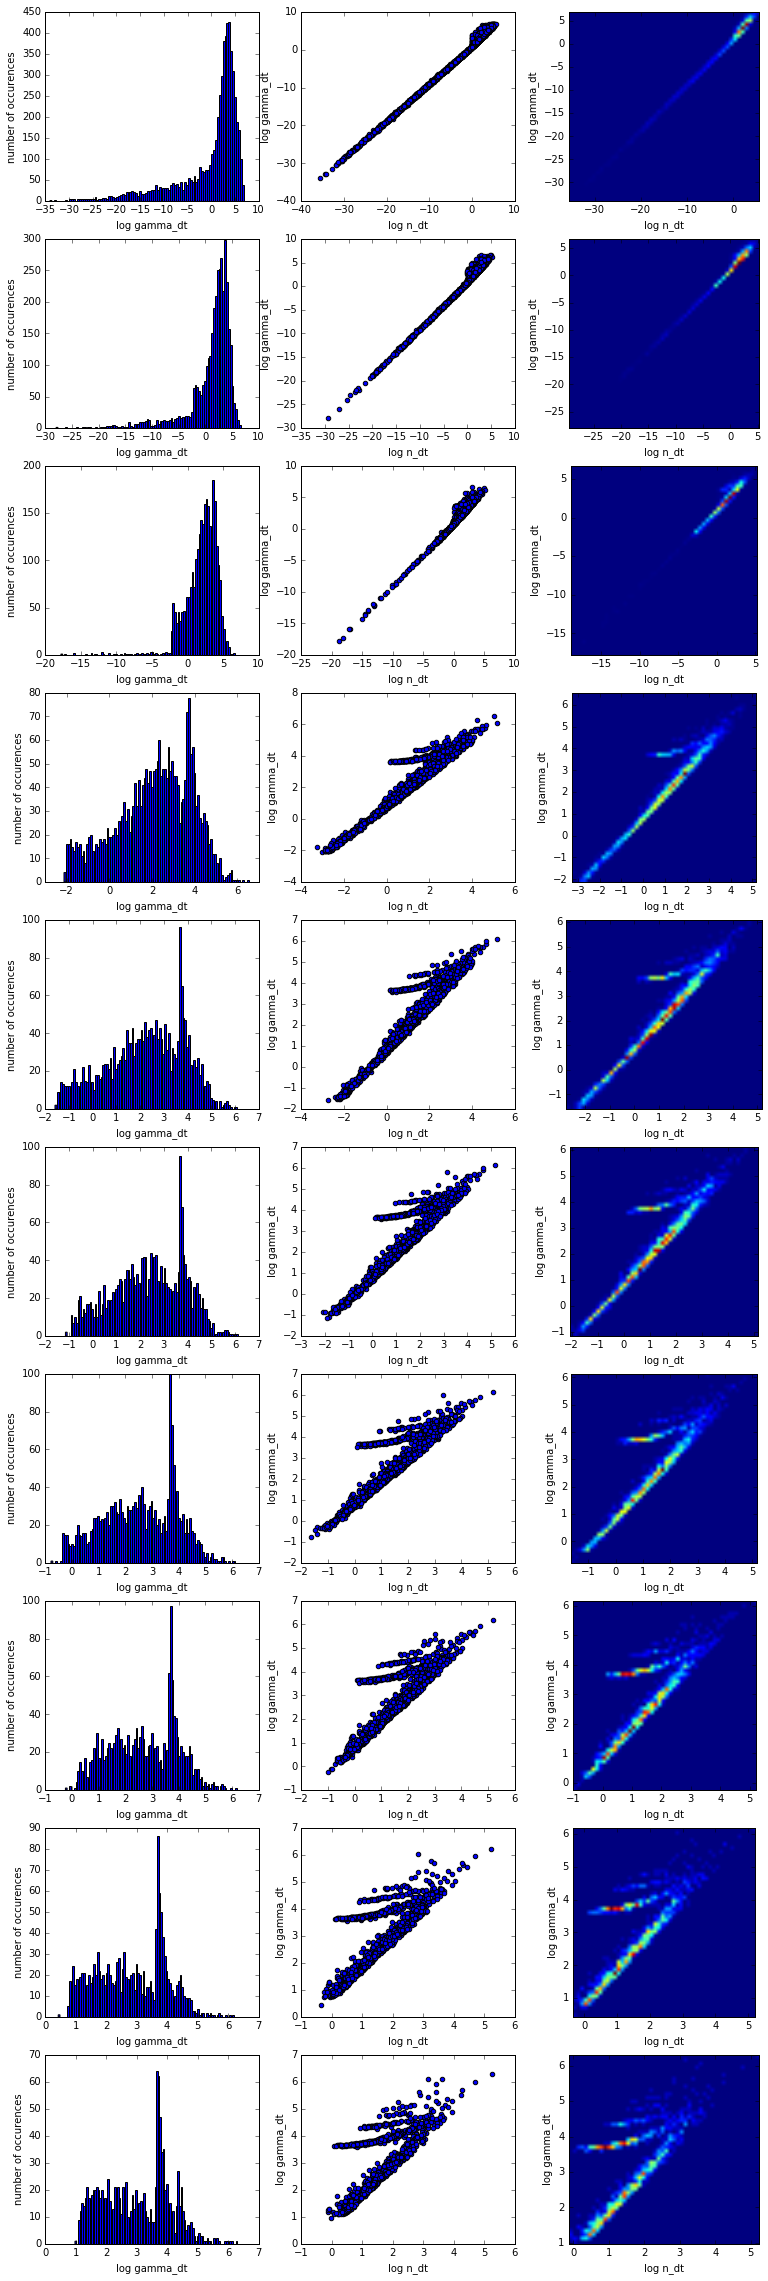

In [30]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 97.5,
    'theta_percentile': 94,
    'theta_obg': True,
    'min_bound': -0.1,
    'return_gamma': True
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

logger = GammaDTLogger(10, 40)
phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=logger,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [22]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776647.0
Average topic correlation	0.2493
Phi nonzeros			5706 	frac	0.512438257746
Theta nonzeros			4202 	frac	0.47266591676
SVM score			0.7491


Правдобие немного ухудшилось, но благодаря этому матрицы ещё более разреженные получились. SVM качество осталось таким же. Зато на подбор параметров ушло много меньше времени.

0
L -775839.605592
1
L -775856.447806
2
L -775917.840571
3
L -776023.092276
4
L -776175.611239
5
L -776340.851203
6
L -776556.960324
7
L -776877.614777
8
L -777319.125398
9
L -778304.596909


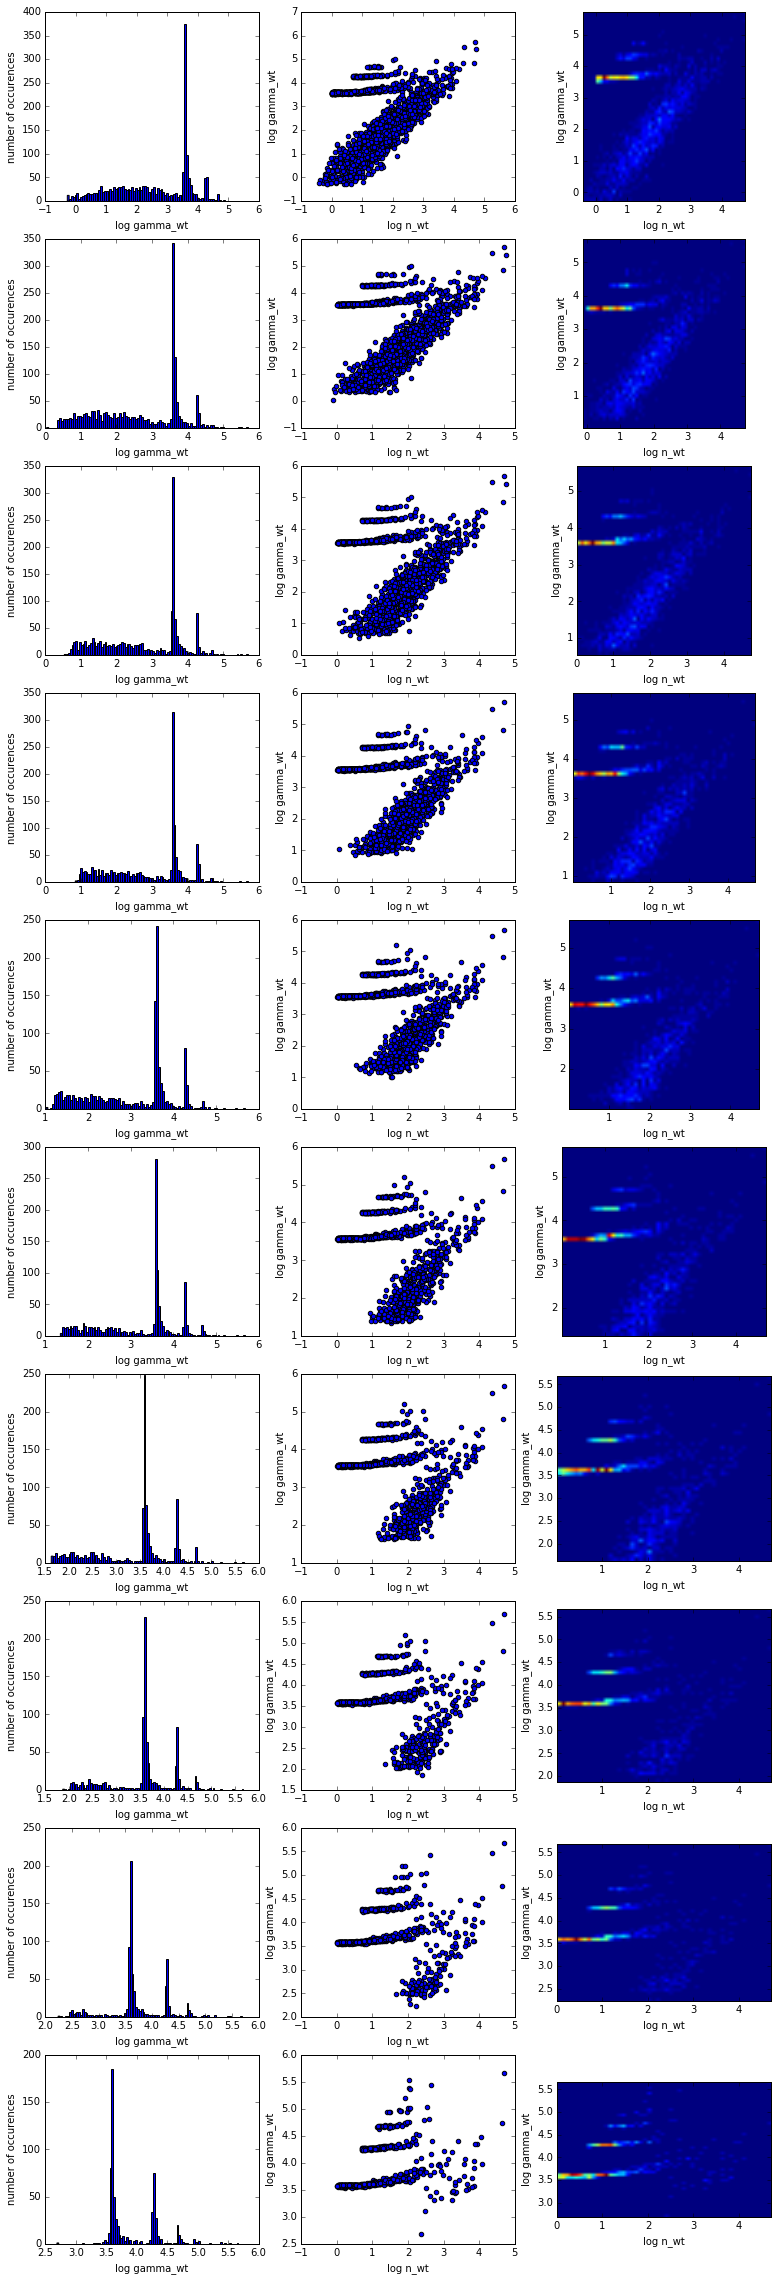

In [33]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 98.5,
    'theta_percentile': 97,
    'theta_obg': True,
    'min_bound': -0.1,
    'return_gamma': True
}

regularizations_list = np.zeros(10, dtype=object)
params_list = np.zeros(10, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = obg_selection_params

logger = GammaWTLogger(10, 0)
phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_sparse,
    theta_matrix=theta_sparse,
    logger=logger,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=10
)

In [34]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-778305.0
Average topic correlation	0.2493
Phi nonzeros			5431 	frac	0.487741356084
Theta nonzeros			3768 	frac	0.423847019123
SVM score			0.7553


## Ещё одно альтернативное решение: разреживать $p_{tdw}$ на Е шаге, чтобы каждое вхождение слова в документ описывалось небольшим числом тем.

In [36]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

big_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': create_frac_of_max_p_dwt_processor(0.5)
}
no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:47] = big_selection_params
params_list[47:50] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=DecorrLogger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -820130.324989
decorr 4.99198902245
L + tau R -820130.324989
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
1
L -818134.945369
decorr 4.99199206386
L + tau R -818134.945369
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
2
L -816143.252192
decorr 4.99187356492
L + tau R -816143.252192
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
3
L -813868.70032
decorr 4.99164514986
L + tau R -813868.70032
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
4
L -811208.079829
decorr 4.99130649012
L + tau R -811208.079829
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
5
L -808210.26557
decorr 4.99086970024
L + tau R -808210.26557
Phi non zeros elements 11135    fraction 1.0
Theta non zeros elements 8615    fraction 0.97
6
L -805051.12136
decorr 4.99036885759
L + tau R -805051.12136

In [38]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-776310.0
Average topic correlation	0.2493
Phi nonzeros			6641 	frac	0.596407723395
Theta nonzeros			3851 	frac	0.433183352081
SVM score			0.7272


Получается очень хорошее разреживание $\Theta$, неплохое разреживание $\Phi$. Однако SVM качество падает.

In [37]:
phi_sparse_ptdw, theta_sparse_ptdw = phi, theta

0
L -776245.705055
1
L -776269.710192
2
L -776339.660526
3
L -776478.173674
4
L -776713.632689
5
L -776991.828685
6
L -777624.893444
7
L -778555.412418
8
L -779500.169167
9
L -780336.479728


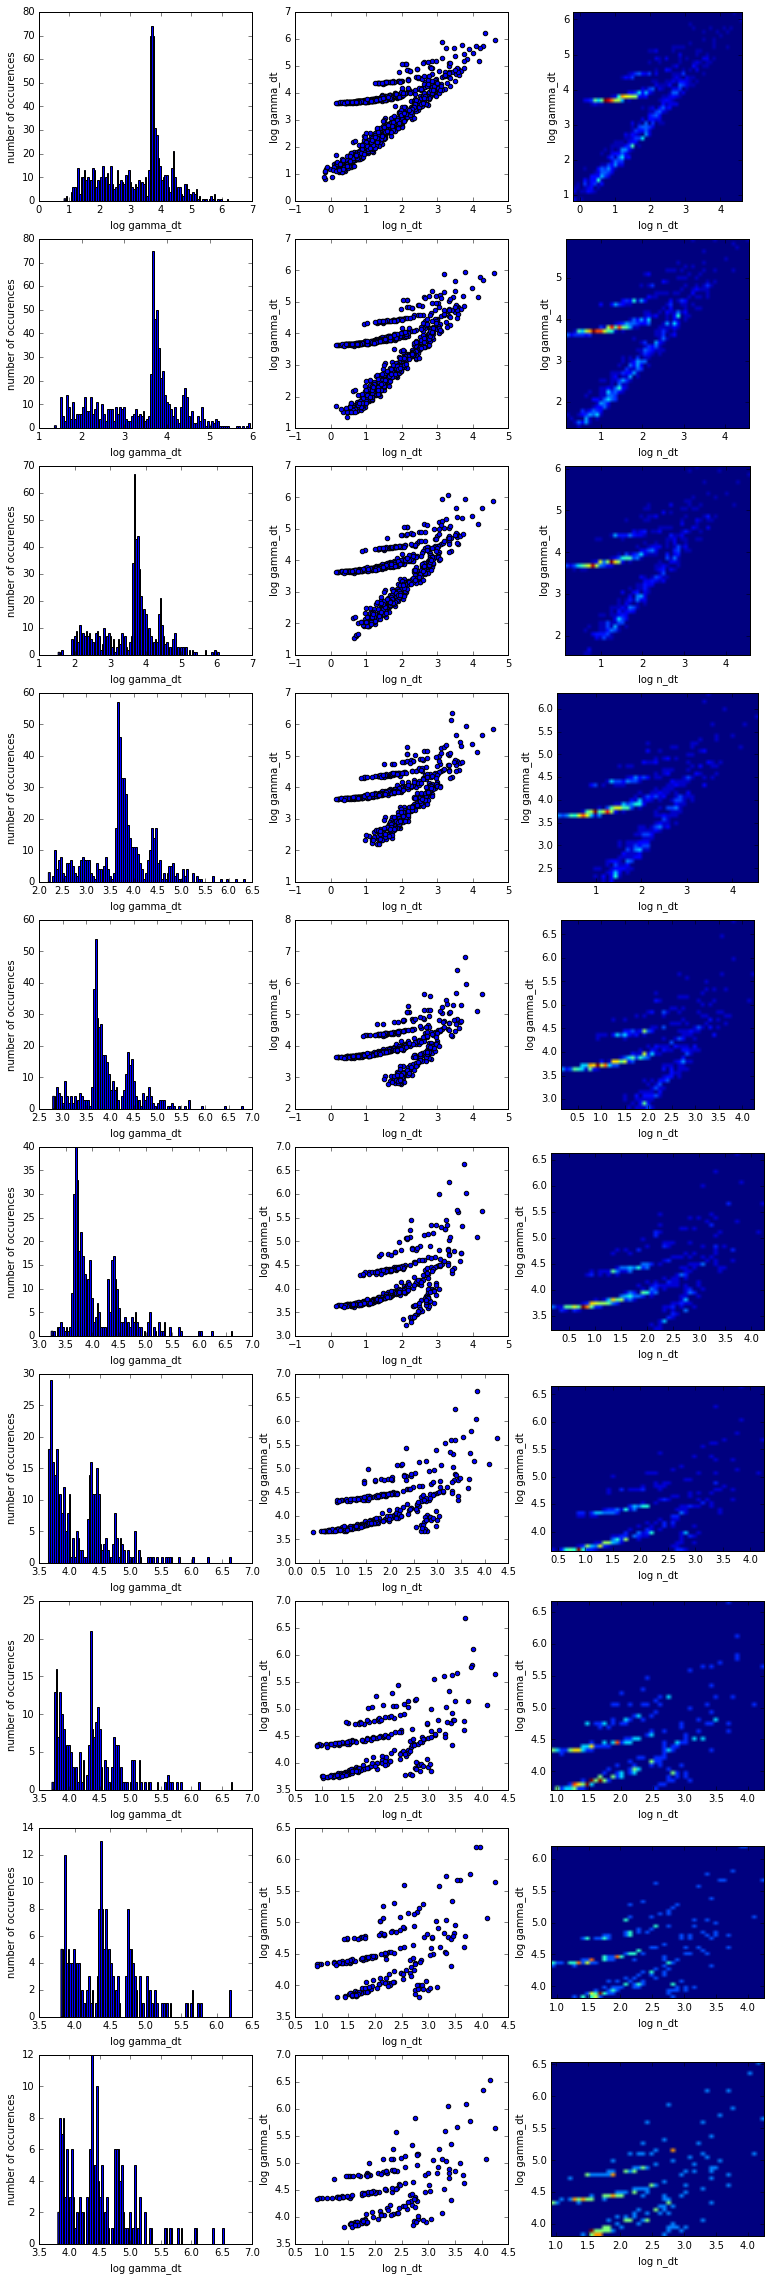

In [42]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 98.5,
    'theta_percentile': 97,
    'theta_obg': True,
    'min_bound': -0.1,
    'return_gamma': True
}

regularizations_list = np.zeros(10, dtype=object)
params_list = np.zeros(10, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = obg_selection_params

logger = GammaDTLogger(10, 0)
phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_sparse_ptdw,
    theta_matrix=theta_sparse_ptdw,
    logger=logger,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=10
)

In [41]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-780336.0
Average topic correlation	0.2493
Phi nonzeros			5729 	frac	0.514503816794
Theta nonzeros			3389 	frac	0.381214848144
SVM score			0.7339
